## KNN Intution example
we used a classified dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified .csv')

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Standardize
we need to standardize the values before we move ahead

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [6]:
scaled_feat = ss.fit_transform(df.drop('TARGET CLASS', axis=1))

In [7]:
scaled_feat

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784987],
       ...,
       [ 0.64177715, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602454, -0.85567   ],
       [-0.38765353, -0.59589427, -1.43139809, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [8]:
df_scaled__feat = pd.DataFrame(scaled_feat,columns=df.columns[:-1])

In [9]:
df_scaled__feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Model creation
Train-test split


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(df_scaled__feat,
                                                 df['TARGET CLASS'], test_size = 0.25, random_state = 0)

## KNN 


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
y_pred = knn.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
acc = accuracy_score(y_test,y_pred)
acc

0.892

In [17]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[100,  13],
       [ 14, 123]], dtype=int64)

# Choosing k value
we will use elbow method

In [18]:
vals = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred_i = knn.predict(x_test)
    vals.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Rate')

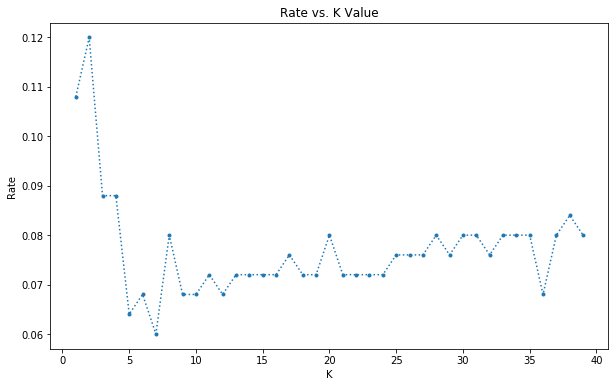

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),vals,linestyle = ':', marker = 'o', markersize = 3)
plt.title('Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Rate')

### Kvalues 
we choose the lowest value in the figure 
we see the lowest point between 5 and 10, here i am selecting 7
if we choose the point above 35, we may get an overfitting condition

In [ ]:
from sklearn.metrics import classification_report

In [24]:
#this is very high
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=7


[[105   8]
 [  7 130]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       113
           1       0.94      0.95      0.95       137

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [28]:
#just for comparision
= KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=1


[[100  13]
 [ 14 123]]


              precision    recall  f1-score   support

           0       0.88      0.88      0.88       113
           1       0.90      0.90      0.90       137

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

